# 利⽤ Keras 套件於 tensorflow 上，使⽤ CNN 深度學習演算法對

# fashion_mnist 資料及進行分類，依序完成以下步驟及問題：

In [1]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())


GPU Available:  True


In [2]:
# 載入內建的MNIST dataset，並import matplotlib，以方便稍後顯示圖形及繪圖。
from keras.datasets import fashion_mnist
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

# 取得資料集
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('X_train.shape={}, y_train.shape={}'.format(X_train.shape, y_train.shape))
print('X_test.shape={}, y_test.shape={}'.format(X_test.shape, y_test.shape))

Using TensorFlow backend.


X_train.shape=(60000, 28, 28), y_train.shape=(60000,)
X_test.shape=(10000, 28, 28), y_test.shape=(10000,)


### 資料前處理 

In [3]:
# 將 X_train 及 X_test dataset 由原本三維轉為四維矩陣以符合CNN的需求
# 這是因為RGB圖片的格式為為width, height, channels，加上ID數維度為4。
# MNIST圖片為灰階因此其channel為1，轉換後的shape為(ID, width, height, channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

print('X_train.shape={}'.format(X_train.shape))
print('X_test.shape={}'.format(X_test.shape))

# 將dataset的特徵值進行標準化，方法是除以255（因為圖像的像素點介於0~255之間）
# 可讓所有的特徵值介於 0 與 1 之間。除了可提昇模型預測的準確度，梯度運算時也能更快收斂。
X_train = X_train / 255
X_test = X_test / 255

# 進行 Onehot encoding，將彼此間不相關且非有序的categories轉換為連續性且是有序數值。
y_train = np_utils.to_categorical(y_train)
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)

X_train.shape=(60000, 28, 28, 1)
X_test.shape=(10000, 28, 28, 1)


### CNN模型的建立

In [5]:
# 匯入建立模型所必要的模組
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# 建立一個線性堆疊模型，之後我們只要將建立的神經網路層依次加入即可。
model = Sequential()

# 建立第一個卷積層並加入model
# 該層有32個filters（即我們稱的filter或kernel）
# kernel大小為5×5，又因為padding=same，所以卷積後的圖形大小不變（即圖像周圍會補值）
# 輸入的圖形維度為28x28x1，並使用relu啟動函數。
# 由於定義了32個filters，因此本層會輸出32個28×28的影像。
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))

# 建立池化層，定義pool size為(2,2)，即尺寸縮小為一半。
# 本層接收了上一層卷積層的32個28×28影像後，會輸出32個14×14的影像。
model.add(MaxPooling2D(pool_size=(2, 2)))

#建立第二個卷積層並加入model
# 這次定義該層有72個filters
# kernel大小為5×5，卷積後的圖形大小不變（即圖像周圍會補值）
# 輸入的圖形維度為(14,14,1)但可省略因為Keras,會自動判斷，使用relu啟動函數。
# 由於定義了72個filters，因此本層會輸出72個14×14的影像。
model.add(Conv2D(filters=72, kernel_size=(5, 5), padding='same', activation='relu'))

# 加入第二個池化層，參數與第一個池化層完全相同。本層會接收72個14×14影像後，輸出72個7×7的影像。
model.add(MaxPooling2D(pool_size=(2, 2)))

# 在各兩層的卷積與池化後，加入Dropout層，減少過度擬合
# Dropout會讓每次batch run都依據機率丟棄一定比例的神經元不予計算，使得每一次都好像在訓練不同的神經網路一樣。
# 下方的程式中，定義該Dropout層每次訓練時要丟棄25%的神經元。
model.add(Dropout(0.25))

# 建立一個平坦層，將特徵值轉為一維資料以供後續的全連結層使用。
# 本層接收第二個池化層傳來的36x7x7（=1764）資料之後，轉為1維的1764。
model.add(Flatten())

# 建立全連結層中的隱藏層(即傳統神經網路中的全連結層)，指定其神經元數目為128個（此數目可調整），啟用函數使用Relu。
model.add(Dense(256, activation='relu'))

# 再加入一層Dropout來防止過度擬合。(此層亦可省略，可視執行結果來決定)
model.add(Dropout(0.5))

# 本模型的最後一層是輸出層，也就是要輸出十種0~9的分類值，一般我們都會使用softmax作為分類模型輸出層的啟動函數。
model.add(Dense(10, activation='softmax'))

# 使用summary指令review一下整個model。
model.summary()   
# 832 = (5*5+1) * 32
# 57672 = (5*5*32+1) * 72

# "+1" 為加bias變數

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 72)          57672     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 72)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 72)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               295168    
__________

### 訓練模型

In [4]:
# 使用compile來定義訓練的參數。
# 損失函數使用深度學習分類模型中最常用的交叉熵cross entropy
# 梯度下降法採取最常用的adam
# 模型的評估方式則是以accuracy為優先。
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 使用fit指令可開始訓練本CNN模型。x與y分別傳入特徵值及分類值。
# epochs=35 代表要執行35次訓練週期（即35次，每次的資料量為48000筆），每個訓練週期會將所有資料以每批次300筆來執行
# batch_size=300 每個訓練週期會將所有資料以每批次300筆來執行
# 即48000/300=160，每個訓練週期會執行160批次，每批次為300筆data
# 每訓練完一個週期，會計算此週期的accuracy與loss放到train_history變數中。
train_history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
                        validation_split=0.2, epochs=35, batch_size=300, verbose=2)

#從下方的執行結果，可以看到loss愈來愈低，accuracy愈來愈高。



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/35


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
	 [[loss/mul/_115]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
0 successful operations.
0 derived errors ignored.

### 評估訓練結果

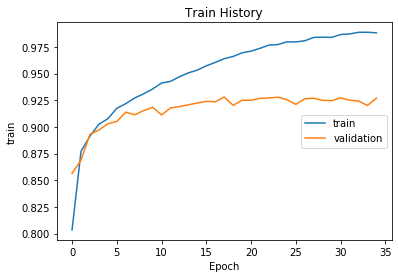

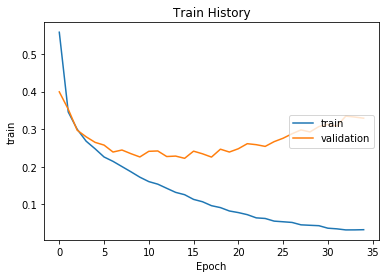

In [16]:
# 定義一個show_train_history函式，我們只要將結果丟入，便可繪成圖表。
def show_train_history(train_history, train, validation):

    plt.plot(train_history.history[train])

    plt.plot(train_history.history[validation])

    plt.title('Train History')

    plt.ylabel('train')

    plt.xlabel('Epoch')

    plt.legend(['train', 'validation'], loc='center right')

    plt.show()

# 顯示train與test dataset訓練過程的準確率。
show_train_history(train_history, 'acc', 'val_acc')

# 顯示train與test dataset訓練過程的誤差率。
show_train_history(train_history, 'loss', 'val_loss')

In [17]:
# 使用test dataset來評估模型的準確率。
scores = model.evaluate(X_test, y_test)
scores[1]

10000/10000 [==============================] - 1s 106us/step


0.9269

### 混淆矩陣

In [18]:
# 判斷目前使用的模型是否混淆了某兩個類別，將某一label預測為另一個label。

import pandas as pd

prediction = model.predict_classes(X_test)

print(y_test.shape)

pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,902,1,9,12,3,1,66,0,6,0
1,1,988,0,6,3,0,1,0,1,0
2,21,0,865,6,62,0,45,0,1,0
3,14,2,9,923,32,0,18,0,2,0
4,0,1,29,13,913,0,41,0,3,0
5,0,0,0,0,0,994,0,5,0,1
6,112,1,46,20,64,0,750,0,7,0
7,0,0,0,0,0,11,0,973,0,16
8,3,0,0,1,0,4,3,1,988,0
